# Basic Pair trading : Idea of Cointegration

#### *** Code ตัวอย่างการประยุกต์ใช้ Cointegration เป็นไอเดียในการทำ pair trading

<img src="cover.jpeg">

ก่อนที่จะเริ่มดูโปรแกรมกัน สำหรับผู้ที่ยังไม่เคยอ่านบทความเรื่อง Cointegration สามารถอ่านได้ที่ 2 บทความนี้ 

1) Basic Pairs Trading (1): Idea of Cointegration

https://algoaddict.wordpress.com/2019/06/22/basic-pairs-trading-1-idea-of-cointegration/

2) Basic Pair Trading (2): การประยุกต์ใช้ Cointegration

https://algoaddict.wordpress.com/2019/06/22/basic-pair-trading-2-%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B8%A2%E0%B8%B8%E0%B8%81%E0%B8%95%E0%B9%8C%E0%B9%83%E0%B8%8A%E0%B9%89-cointegration/

### *** หลังจากอ่านทำความเข้าใจบทความท้้ง 2 เรียบร้อยแล้ว ก็มาเริ่มดู Code กันเลย  ***

# ก่อนจะเริ่มใช้ข้อมูลหุ้นจริง มาลองทบทวนเรื่อง cointegration กันซักนิดกับข้อมูลจำลองกันก่อน

## Step 1: Import ไลบรารี่ที่จำเป็น

In [1]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

import matplotlib.pyplot as plt

In [2]:
# กำหนด seed เพื่อใช้ในการสุ่มตัวเลข
np.random.seed(107)

## Step 2: จำลองหุ้น X และ Y ขึ้น เพื่อใช้ในการทำความเข้าใจเรื่อง Cointegration

จำลองข้อมูลหุ้น X ขึ้นมาจาก การ Random

In [3]:
# สร้าง Daily return ด้วยการสุ่มตัวเลข 100 ตัว ขึ้นจาก normal distribution
X_returns = np.random.normal(0, 1, 100) 

# หาค่า cumulative sum ของค่า X_returns ที่ส่งมาได้ และ บวก ค่า 50 เข้าไป เพื่อให้ช่วงในช่วงค่าที่สมจริงมากขึ้น
X = pd.Series(np.cumsum(X_returns), name='X') + 50

Text(0.5, 0.98, 'Stock X')

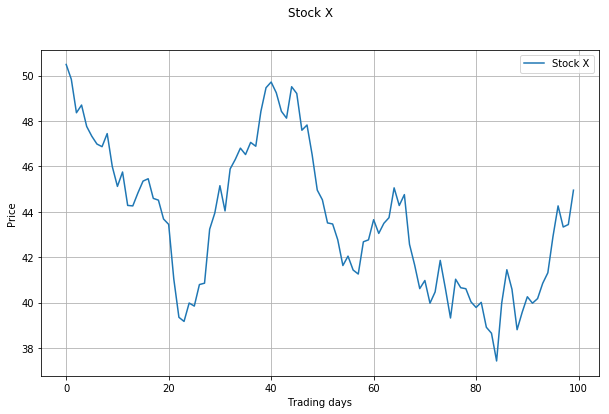

In [4]:
# พล็อตค่าหุ้น X ที่เราได้สร้างขึ้นมา

plt.figure(figsize=(10,6))     
ax1 = plt.subplot2grid((4,1), (0,0), rowspan = 4, colspan = 1)

ax1.plot(X, label = 'Stock X')

ax1.set_ylabel('Price')
ax1.set_xlabel('Trading days')

ax1.grid(True, zorder=0)
ax1.legend()
plt.suptitle('Stock X') 

จำลองข้อมูล หุ้น Y ขึั้น โดยใช้ ค่าของหุ้น X นำมาเพิ่มค่า และ ใส่ noises เข้าไป

In [5]:
# สร้าง noise ขึ้นมา 100 ตัว จากการสุ่ม ขึ้นจาก Normal distribution
some_noise = np.random.normal(0, 1, 100)

# สร้างข้อมูลหุ้น Y ขึ้นจาก การเพิ่มค่า และ Noise เข้าไป
Y = X + 5 + some_noise

Text(0.5, 0.98, 'Stock Y')

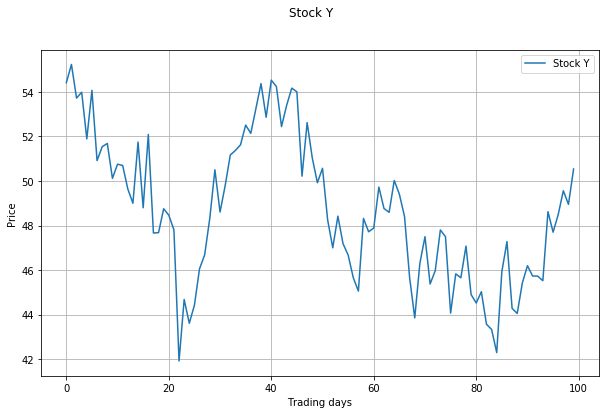

In [6]:
# พล็อตค่าหุ้น Y ที่สร้างขึ้นมา

plt.figure(figsize=(10,6))     
ax1 = plt.subplot2grid((4,1), (0,0), rowspan = 4, colspan = 1)

ax1.plot(Y, label = 'Stock Y')

ax1.set_ylabel('Price')
ax1.set_xlabel('Trading days')

ax1.grid(True, zorder=0)
ax1.legend()
plt.suptitle('Stock Y') 

Text(0.5, 0.98, 'Stock X and Y')

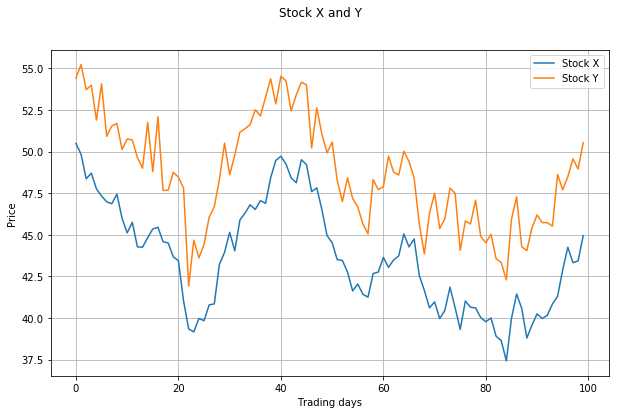

In [7]:
# ทดลองพล็อตหุ้นทั้งสองด้วยกัน

plt.figure(figsize=(10,6))     
ax1 = plt.subplot2grid((4,1), (0,0), rowspan = 4, colspan = 1)

ax1.plot(X, label = 'Stock X')
ax1.plot(Y, label = 'Stock Y')

ax1.set_ylabel('Price')
ax1.set_xlabel('Trading days')

ax1.grid(True, zorder=0)
ax1.legend()
plt.suptitle('Stock X and Y') 

เห็นได้ชัดเจนว่า หุ้น X และ Y มีการเคลื่อนไหวคล้ายกันมาก เนื่องจากหุ้น Y สร้างจากหุ้น X นั่งเอง ต่อไปนี้เราจะมาดูกันว่า เจ้าหุ้น 2 ตัวนี้ มีค่า Cointegration อย่างไร

# Test for Cointegration and correlation

สร้างข้อมูลเสร็จแล้ว มาลองทดสอบข้อมูลกันดูดีกว่าว่าข้อมูล 2 ชุด คือ หุ้น X และ Y นี้ มีค่า Cointegration และ Correlation เป็นยังไงกันบ้าง (ถ้ายังไม่เข้าใจเจ้าค่า 2 ตัวนี้ ขอให้กลับไปอ่านลิงก์ด้านบนที่ให้ไว้ก่อนค่ะ)

### ทดสอบ Cointegraion

In [8]:
score, pvalue, _ = coint(X,Y)

In [9]:
pvalue

2.0503418653412224e-16

### ทดสอบ Correlation

In [10]:
X.corr(Y)

0.9497090646385932

### อ่านผลลัพธ์

ในที่นี้ค่า p-value ทีได้จากการทดสอบ cointegration ด้วยคำสั่ง (coint(X,Y)) มีค่าน้อยกว่า 0.05 เราจะสามารถแปลผลลัพธ์ได้ว่า "ข้อมูลนี้ Conintegrated ต่อกัน" และ เมื่อมาดูว่า correlation ด้วยคำสั่ง X.corr(Y) ก็พบว่ามีค่าเป็น บวก เข้าใกล้ 1 จึงสามารถแปลผลได้ว่า "ข้อมูล 2 ชุดนี้ positive correlated ต่อกัน" 

### วิเคราะห์ผลลัพธ์

1) "Correlation" --> ข้อมูลนี้ มองด้วยตาก็จะเห็นค่อนข้างชัดเจนว่าข้อมูลวิ่งไปในทิศทางเดียวกัน และ ยิ่งเราทราบว่า ชุดข้อมูล Y ถูกสร้างมาจาก ชุดข้อมูล X แล้วทำมาปรับค่าเพิ่ม และ ใส่ noise เข้าไป ก็ไม่แปลกใจเลย ว่าทำไมค่า correlation ถึงได้สูง แบบนี้

2) "Cointegration" --> อาจจะมองด้วยตาเปล่าได้ไม่ชัดเจนเท่า Correlation แต่ถ้าเรามองไปยังการสร้างข้อมูลที่สร้างด้วยการสุ่มจากฟังก์ชันน์เดียวกัน ข้อมูลสุ่มทั้งหมดที่ใช้มีการแจกแจงแบบ normal distribution ก็ไม่แปลกที่ความแตกต่างของข้อมูลทั้งสองชุดนี้จะวิ่งกลับไปมารอบๆ ค่า mean ก็มีความเป็นไปได้ที่จะเป็น cointegrated กัน 

มาลองดู่ค่านี้จากกราฟกันดีกว่า อาจจะมองง่ายขึ้น

Text(0.5, 0.98, 'Price Spread')

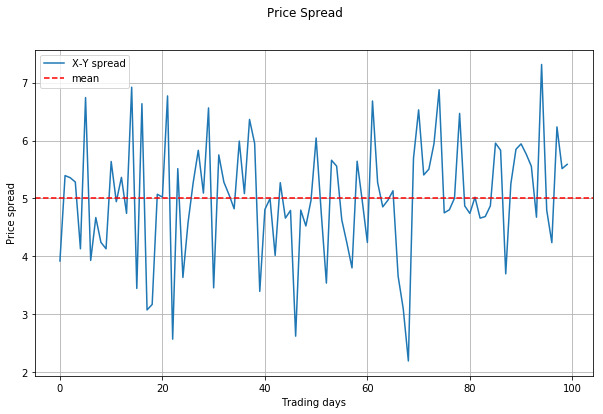

In [11]:
# พล็อตค่า spread ระหว่าง X และ Y

plt.figure(figsize=(10,6))     
ax1 = plt.subplot2grid((4,1), (0,0), rowspan = 4, colspan = 1)

ax1.plot(Y-X, label = 'X-Y spread')
ax1.axhline((Y-X).mean(), label = 'mean', color = 'red', linestyle = '--')

ax1.set_ylabel('Price spread')
ax1.set_xlabel('Trading days')

ax1.grid(True, zorder=0)
ax1.legend()
plt.suptitle('Price Spread') 

จากกราฟ ก็จะเห็นว่า Spread หรือ ความต่างระหว่างหุ้น X และ Y ของเรา มันวิ่งขึ้นๆ ลงๆ อยู่รอบๆ ค่า mean ของตัวมันเองนะคะ แสดงให้เห็ฯว่าข้อมูล 2 ชุดนี้ cointegrated กัน ... เจ้าข้อมูลแบบนี้นี่ล่ะค่ะ ที่เรามองหา เพื่อที่จะ ทำ pair trading กัน!!!

เอาล่ะค่ะ ทบทวนกันพอสมควรแล้ว มาดูการทำงานกับชุดข้อมูลจริงกันดีกว่าค่ะ

# เริ่มทำงานกับข้อมูลหุ้นจริง

## step 1: ค้นหาหุ้นที่ต้องการ!

แน่นอนว่ากลยุทธ์นี้จะทำงานได้ เราก็ต้องเจอหุ้นที่เข้าข่ายที่เรากำลังมองหา คือ หุ้น 2 ตัว ที่ cointegrated กันค่ะ เพื่อที่เราจะสามารถสร้างกลยุทธ์ Hedging ได้ ในที่นี้ เราจะสร้าง ฟังก์ชันชื่อ find_cointegrated_pairs ขึ้นมา ฟังก์ชันนี้จะรับค่าราคาของหุ้นทุกตัวที่เราต้องการทำการทดสอบ และ คำนวณค่า Cointegration ของทุกคู่หุ้น และ return หุ้นที่ cointegrated กันออกมา

In [12]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

## Step2: อ่านข้อมูลหุ้นทังหมดที่ต้องการทดสอบ

อ่านข้อมูล จากไฟล์ pdf (หรือ จะอ่านจาก yahoo, google, siam chart ตามที่เคยสอนใน Algoaddict ไปแล้วก็ได้ค่ะ)

In [13]:
symbList = ['CARR_L','COST_L', 'D4T4_L', 'FERG_L', 'GOOG', 'MACF_L', 'MCD', 'MKS_L', 'OXIG_L', 'SXS_L', 'TSCO_L']
stock = pd.DataFrame()
col = list()

for symb in symbList:
    df = []
    df = pd.read_csv('Data/' + symb + '.csv',index_col=0, parse_dates=True)
    stock[symb] =  df['Close']
    col.append(symb)

stock.columns = [col]
stock.dropna(inplace = True)

In [14]:
stock.head()

,CARR_L,COST_L,D4T4_L,FERG_L,GOOG,MACF_L,MCD,MKS_L,OXIG_L,SXS_L,TSCO_L
Date,,,,,,,,,,,
2004-08-19,32.900002,347.394989,13.5,3990.500000,49.845802,21.5,26.600000,348.25,196.5,412.0,264.00
2004-08-20,33.000000,347.394989,13.5,4000.050049,53.805050,21.5,27.070000,345.75,196.5,411.5,263.75
2004-08-23,33.150002,349.579987,13.5,4028.689941,54.346527,21.5,26.639999,345.75,196.5,425.0,266.00
2004-08-24,33.150002,347.394989,13.5,4066.879883,52.096165,21.5,26.870001,346.00,195.5,420.0,265.00
2004-08-25,33.150002,347.394989,13.5,4100.290039,52.657513,22.0,26.950001,349.50,195.5,423.0,266.50


## Step 3 คำนวณค่า Cointegration ของหุ้นทุกคู่ 

เพื่อหาคู่หุ้นที่ cointegrated กัน

In [15]:
# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
scores, pvalues, pairs = find_cointegrated_pairs(stock)

[(('COST_L',), ('FERG_L',))]


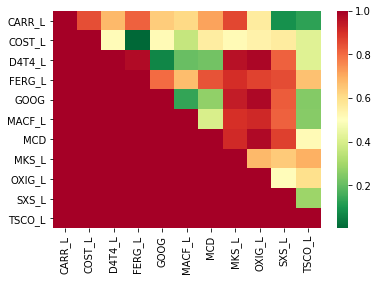

In [16]:
import seaborn

seaborn.heatmap(pvalues, xticklabels=symbList, yticklabels=symbList, cmap='RdYlGn_r')
            
print(pairs)

ในที่นี้จะเห็นว่าคู่หุ้นที่เราจะเลือกคือ COST_L และ FERG_L เนื่องจากเป็นคู่หุ้นที่ให้ค่า p-value ต่ำที่สุด (=0.002) ซึ่งหมายความว่าหุ้น 2 ตัวนี้ cointegrated กันมากที่สุด ในจำนวนหุ้นทั้งหมด

### มาดูหน้าตาของหุ้น 2 ตัวนี้กัน

In [17]:
S1 = stock['FERG_L']
S2 = stock['COST_L']

Text(0.5, 0.98, 'Selected stocks : FERG_L and COST_L')

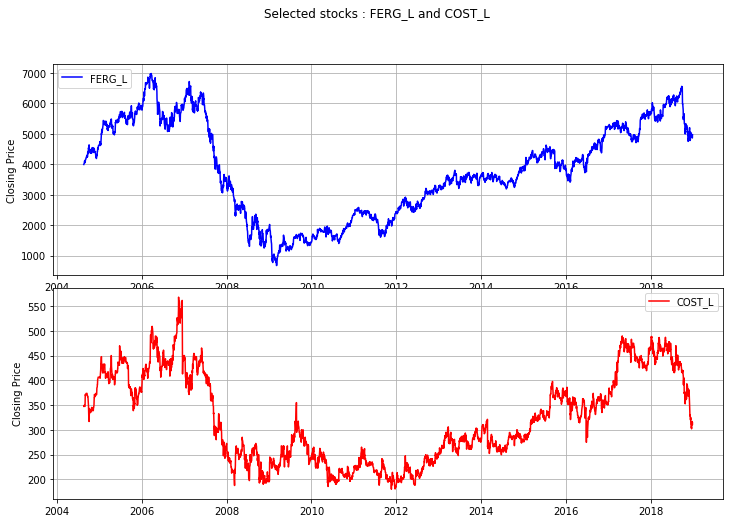

In [18]:
# plot graph
plt.figure(figsize=(12,8))
    
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)
ax2 = plt.subplot2grid((6,1), (3,0), rowspan = 3, colspan = 1)


ax1.plot(S1, label = 'FERG_L', color = 'blue')
ax2.plot(S2, label = 'COST_L', color = 'red')

ax1.set_ylabel('Closing Price')
ax2.set_ylabel('Closing Price')

ax1.grid(True, zorder = 0)
ax2.grid(True, zorder = 0)

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')

plt.suptitle('Selected stocks : FERG_L and COST_L') 

In [19]:
score, pvalue, _ = coint(S1, S2)
pvalue

0.007905497049899093

## Step3: คำนวณ spread ของหุ้น 2 ตัวที่เลือกมาได้จากขั้นตอนก่อนหน้า

ในที่นี้จะใช้ linear regression เข้ามาช่วยในการหาค่า coefficient ระหว่างหุ้นทั้งสองตัว

In [20]:
# หาค่า coefficient 
S1 = sm.add_constant(S1)
S1.columns = ['const', 'FERG_L']
results = sm.OLS(S2, S1).fit()
b = results.params['FERG_L']

In [21]:
# ปรับข้อมูลให้อยู่ในรูปแบบที่สามารถหา spread ระหว่างกันได้
S1 = S1['FERG_L']
S2 = S2.iloc[:,0]

In [22]:
# ห่าค่า Spread 
spread = S2 - b * S1

Text(0.5, 0.98, 'Spread')

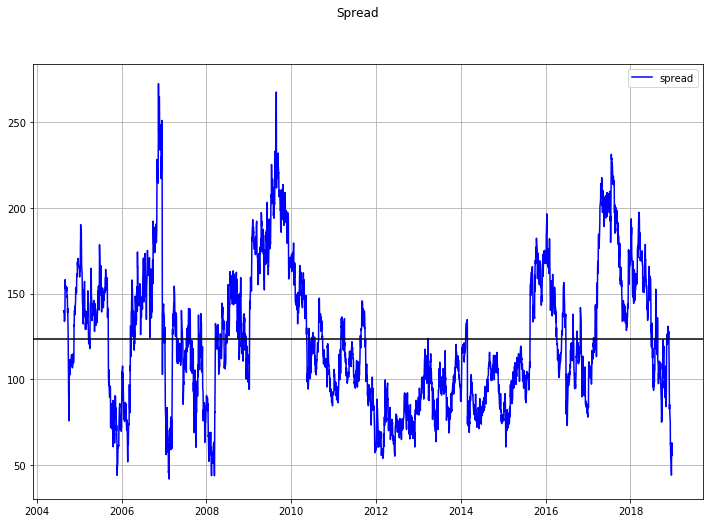

In [23]:
# ทดลอง plot Spread ดู

plt.figure(figsize=(12,8))
    
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 3, colspan = 1)

ax1.plot(spread, label = 'spread', color = 'blue')
ax1.axhline(spread.mean(), color='black')

ax1.grid(True, zorder = 0)
ax1.legend(loc = 'best')

plt.suptitle('Spread') 

จะเห็นว่า Spread มีการแกว่งไปมา รอบๆ ค่า mean ถึงแม้จะไม่ได้สมบูรณ์แบบเหมือนในตัวอย่างจากข้อมูลจำลองก็ตาม ก็ก็ถือว่า สามารถนำทำใช้ทำ pair trading ได้

## Step4: คำนวณ Z score เพื่อกำหนดจุดเข้า ซื้อ / ขาย

In [24]:
# สร้างฟังก์ชันเพื่อคำนวณ Z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)

Text(0.5, 0.98, "['Spread z-score', 'Mean', '+1', '-1']")

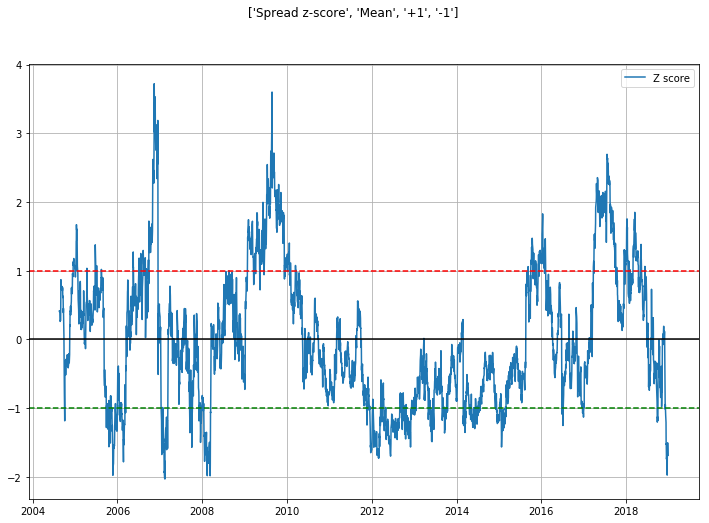

In [25]:
plt.figure(figsize=(12,8))
    
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 3, colspan = 1)
ax1.plot(zscore(spread),label = 'Z score')

ax1.axhline(zscore(spread).mean(), color='black')
ax1.axhline(1.0, color='red', linestyle='--')
ax1.axhline(-1.0, color='green', linestyle='--')

ax1.grid(True, zorder = 0)
ax1.legend(loc = 'best')

plt.suptitle(['Spread z-score', 'Mean', '+1', '-1']) 

## จบส่วนของการคำนวณกันแล้ว ต่อมาจะมาลองดู Strategy ที่แนะนำให้ไปลองทำดูกันค่ะ

trick ของการใช้ Cointegration เข้ามาช่วยในที่นี้คือ การทำ Hedging เพื่อป้องกันความเสี่ยง โดยการ long security ตัวนึง และ ขณะเดียวกันก็ทำการ Short security อีกตัวหนึ่ง นั้นเองค่ะ

### Going "Long" the spread:

เมื่อ spread มีขนาดเล็ก (Z-score < -1) เราจะคาดหวังว่า spread จะมีขนาดใหญ่ขึ้น ดังนั้น จะทำการ Long S2 และ Short S1

### Going "Short" the spread:

เมื่อ spread มีขนาดใหญ่ (Z-score > 1) เราจะคาดหวังว่า spread จะมีขนาดเล็กลง ดังนั้น จะทำการ Short S1 และ Long S2

### Exit postions 
เมื่อ Z-score = 0 จะทำการ exit position.

ก็จบกันไปแล้วนะคะ สำหรับ Coding การหาค่า Cointegration การหาคู่หุ้นที่น่าสนใจตามหลักการของ Cointegration รวมไปจนถึง ไอเดียในการทำ Pair Trading อย่างง่ายจาก Conintegration ผู้อ่านท่านใดสนใจ สามารถทำ Strategy ไปทำการ Backtest ต่อกันได้เลยค่ะ Source code สามารถนำไปใช้งานต่อได้โดยไม่สงวนลิขสิทธิ์แต่อย่างใด

*** เนื้อหาจากการเข้าร่วมงาน Workshop ของ Quantopian ณ กรุงลอนดอน ประเทศอังกฤษ ขอแสดงความขอบคุณ ไว้ ณ ที่นี้ค่ะ ***